# Make splits for task 2 (reaction extrapolation i.e. enzyme retrieval)

For reaction extrapolation, we want to test for how well each method can predict the reactions.

In [58]:
import pandas as pd
import numpy as np
import random

In [59]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')

In [64]:
price = pd.read_csv('../splits/task1/price_protein_test.csv')


In [71]:
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')
reaction2EC = reaction2EC.dropna(subset='Mapped Reaction') #remove rows with no mapped reaction for now

reaction2EC['EC3'] = reaction2EC['EC number'].str.split('.').str[:3].str.join('.')
reaction2EC['EC2'] = reaction2EC['EC number'].str.split('.').str[:2].str.join('.')
reaction2EC['EC1'] = reaction2EC['EC number'].str.split('.').str[:1].str.join('.')
# reaction2EC ### Maybe include the ones that map to multiple ECs?

(array([5.3469e+04, 1.8250e+03, 6.9700e+02, 1.9300e+02, 1.1900e+02,
        3.7000e+01, 0.0000e+00, 4.9000e+01, 0.0000e+00, 6.4000e+01]),
 array([ 1. ,  7.3, 13.6, 19.9, 26.2, 32.5, 38.8, 45.1, 51.4, 57.7, 64. ]),
 <BarContainer object of 10 artists>)

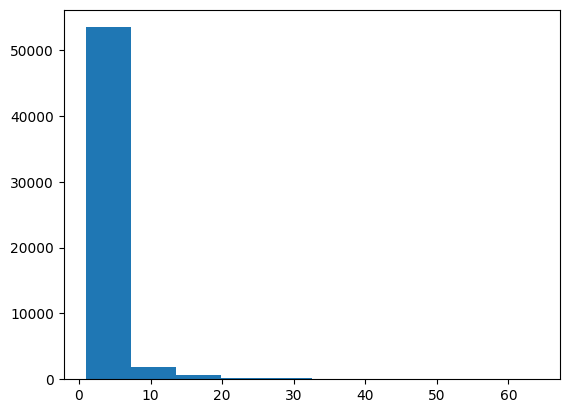

In [78]:
from collections import defaultdict
reaction_to_ec = defaultdict(list)
for reaction, ec in reaction2EC[['Reaction', 'EC number']].values:
    reaction_to_ec[reaction].append(ec)
reaction2EC['Reactions with a single EC'] = [len(reaction_to_ec.get(r)) for r in reaction2EC['Reaction'].values]
plt.hist(reaction2EC['Reactions with a single EC'])

In [79]:
reaction2EC = reaction2EC[reaction2EC['Reactions with a single EC'] == 1]
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,1
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,1
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,1
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,1
8,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,N-benzyl-4-piperidone + NADH + H+ = N-benzylpi...,1.1.1,1.1,1,True,1
...,...,...,...,...,...,...,...,...,...
63529,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATPgammaS + ATP = P1,P4-bis(5'-adenosyl) tetra...",6.5.1,6.5,6,True,1
63534,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATP + ATP = P1,P4-bis(5'-adenosyl) tetraphosph...",6.5.1,6.5,6,True,1
63537,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)O[C@H]3[C@@H](O...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",6.5.1,6.5,6,True,1
63538,C=C(C)CCOP(=O)(O)OP(=O)(O)OP(=O)(O)O.Nc1ncnc2c...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl triphosphate = isopentenyl-t...,6.5.1,6.5,6,True,1


In [83]:
reaction2EC['Duplicated EC'] = reaction2EC['EC number'].duplicated(keep=False)
reaction2EC = reaction2EC[reaction2EC['Duplicated EC'] == True] #only keeps ECs with multiple example reactions
unique_reactions_multiple_ec = reaction2EC.copy()

In [82]:
unique_reactions_multiple_ec

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,1
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,1
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,1
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,1
8,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,N-benzyl-4-piperidone + NADH + H+ = N-benzylpi...,1.1.1,1.1,1,True,1
...,...,...,...,...,...,...,...,...,...
63529,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATPgammaS + ATP = P1,P4-bis(5'-adenosyl) tetra...",6.5.1,6.5,6,True,1
63534,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATP + ATP = P1,P4-bis(5'-adenosyl) tetraphosph...",6.5.1,6.5,6,True,1
63537,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)O[C@H]3[C@@H](O...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",6.5.1,6.5,6,True,1
63538,C=C(C)CCOP(=O)(O)OP(=O)(O)OP(=O)(O)O.Nc1ncnc2c...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl triphosphate = isopentenyl-t...,6.5.1,6.5,6,True,1


### The hard test set will have a different test set

Technically this doesn't require it to be an EC with a duplicated reaction class
Cannot use the same ECs as the first split, otherwise all of the data will be held out

In [93]:
EC_df = pd.DataFrame({'EC number': unique_reactions_multiple_ec['EC number'].unique()})
EC_df['EC3'] = EC_df['EC number'].str.split('.').str[:3].str.join('.')
EC_df['EC2'] = EC_df['EC number'].str.split('.').str[:2].str.join('.')
EC_df['EC1'] = EC_df['EC number'].str.split('.').str[:1].str.join('.')

EC_df

,EC number,EC3,EC2,EC1
0,1.1.1.1,1.1.1,1.1,1
1,1.1.1.10,1.1.1,1.1,1
2,1.1.1.100,1.1.1,1.1,1
3,1.1.1.101,1.1.1,1.1,1
4,1.1.1.102,1.1.1,1.1,1
...,...,...,...,...
2578,6.4.1.2,6.4.1,6.4,6
2579,6.4.1.3,6.4.1,6.4,6
2580,6.4.1.4,6.4.1,6.4,6
2581,6.5.1.1,6.5.1,6.5,6


In [94]:
np.random.seed(42)
random.seed(42)
EC_grouped_df = EC_df.groupby('EC3').sample(1)[['EC3' , 'EC2', 'EC1']]
EC_grouped_df

,EC3,EC2,EC1
9,1.1.1,1.1,1
229,1.1.3,1.1,1
244,1.1.5,1.1,1
252,1.1.98,1.1,1
255,1.1.99,1.1,1
...,...,...,...
2569,6.3.3,6.3,6
2571,6.3.4,6.3,6
2576,6.3.5,6.3,6
2579,6.4.1,6.4,6


## Hard set generation

 For the hard set, reactions are held out from level 3, and then there is a random sample from this set.

## Filter for "hard reactions"

In [117]:
np.random.seed(42)
random.seed(42)

# Make sure they are evenly distributed over different EC2's
EC2_selected = EC_grouped_df.groupby('EC2').sample(1)
EC3s_hard = EC2_selected['EC3'].values
EC3s_hard #these are the ones to hold out at level 3

np.random.seed(42)
random.seed(42)

EC_df_selected = EC_df[EC_df['EC3'].isin(EC3s_hard)]
ECs = EC_df_selected.sample(frac=1).groupby("EC3").head(4)['EC number'].values #sample up to 4 if availalbe most ECs don't have that many examples at level 4
len(ECs)
hard_reactions = unique_reactions_multiple_ec[unique_reactions_multiple_ec['EC number'].isin(ECs)]
print(len(hard_reactions))
hard_test = hard_reactions.groupby('EC number').sample(1) # Select a single sample for testing (and then the rest will be training)
hard_test

2493


,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC
7701,CC(C)=CCC/C(C)=C/CC/C(C)=C\CO.O=O>>CC(C)=CCC/C...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,1.1.3.20,farnesol + O2 = farnesal + H2O2,1.1.3,1.1,1,True,1
7714,CC(=O)N[C@@H]1C(O)O[C@H](CO)[C@@H](O)[C@@H]1O....,[CH3:1][C:2](=[O:3])[NH:4][C@@H:5]1[CH:6]([OH:...,1.1.3.29,N-acetyl-D-mannosamine + O2 = N-acetyl-D-manno...,1.1.3,1.1,1,True,1
7765,O=C[C@H](O)CO.O=O>>O=C[C@@H]1OC1O.OO,[O:1]=[CH:2][C@H:3]([OH:4])[CH2:5][OH:6].[O:7]...,1.1.3.41,D-glyceraldehyde + O2 = D-glycerate + H2O2,1.1.3,1.1,1,True,1
7926,O=O.O=[N+]([O-])c1cccc(CO)c1>>O=Cc1cccc([N+](=...,[O:1]=[O:2].[O:3]=[N+:4]([O-:5])[c:6]1[cH:7][c...,1.1.3.9,3-nitrobenzyl alcohol + O2 = 3-nitrobenzaldehy...,1.1.3,1.1,1,True,1
8452,O=C(O)[C@@H]1C=CCC2=C1N=C1CC=C[C@@H](C(=O)O)[C...,[O:1]=[C:2]([OH:3])[C@@H:4]1[CH:5]=[CH:6][CH2:...,1.10.3.16,"(1R,5aS,6R)-1,4,5,5a,6,9-hexahydrophenazine-1,...",1.10.3,1.10,1,True,1
...,...,...,...,...,...,...,...,...,...
63475,CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(...,[CH3:1][C:2](=[O:3])[S:4][CH2:5][CH2:6][NH:7][...,6.4.1.2,UTP + acetyl-CoA + HCO3- = UDP + phosphate + m...,6.4.1,6.4,6,True,1
63484,CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,[CH3:1][CH2:2][C:3](=[O:4])[S:5][CH2:6][CH2:7]...,6.4.1.3,ATP + propanoyl-CoA + HCO3- = ADP + phosphate ...,6.4.1,6.4,6,True,1
63495,C/C=C/C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP...,[CH3:1]/[CH:2]=[CH:3]/[C:4](=[O:5])[S:6][CH2:7...,6.4.1.4,glutaconyl-CoA + H+ = crotonyl-CoA + CO2 {r},6.4.1,6.4,6,True,1
63510,Nc1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)OP(=O)(...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@H:6]2[CH2:7]...,6.5.1.1,"ATP + dCTP = P1-(5'-adenosyl),P4-[5'-(2'-deoxy...",6.5.1,6.5,6,True,1


### The easy and medium test splits will share the same test set

Should probably correlate it so that some fothe reactions used in the hard test set are also used in the easy and medium
But the holdout sequences will be different

In [118]:
np.random.seed(42)
random.seed(42)
#remove the EC3s that were selected for the hard test
EC_df_nothard = EC_df[~EC_df['EC3'].isin(EC3s_hard)]

#sample a random one from each EC
EC_df_selected = EC_df_nothard.groupby('EC3').sample(1)
ECs = EC_df_selected['EC number'].values

# Get the reactions for these ECs
filtered = unique_reactions_multiple_ec[unique_reactions_multiple_ec['EC number'].isin(ECs)]

np.random.seed(42)
random.seed(42)
# Just get a sample from the ECs for reaction set 1
easy_test = filtered.groupby('EC number').sample(1)

# For the medium test, we want to remove a sample of level 4 EC numbers. 
np.random.seed(42)
random.seed(42)
# Here we know we're getting a different set to the ones from the hard set
medium_test = filtered.groupby('EC3').sample(1)



easy_medium_test = pd.concat([easy_test, medium_test]).sort_values('EC number')
easy_medium_test

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC
753,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.11,meso-erythritol + NAD+ = L-erythrose + NADH + H+,1.1.1,1.1,1,True,1
753,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.11,meso-erythritol + NAD+ = L-erythrose + NADH + H+,1.1.1,1.1,1,True,1
7930,COC1=C(OC)C(=O)C(CC=C(C)C)=C(C)C1=O.C[C@@H](O)...,[CH3:19][C@@H:20]([OH:21])[C:22](=[O:23])[OH:2...,1.1.5.12,D-lactate + ubiquinone 1 = pyruvate + reduced ...,1.1.5,1.1,1,True,1
7930,COC1=C(OC)C(=O)C(CC=C(C)C)=C(C)C1=O.C[C@@H](O)...,[CH3:19][C@@H:20]([OH:21])[C:22](=[O:23])[OH:2...,1.1.5.12,D-lactate + ubiquinone 1 = pyruvate + reduced ...,1.1.5,1.1,1,True,1
8160,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,1.1.98.6,CTP + formate = dCTP + CO2 + H2O,1.1.98,1.1,1,True,1
...,...,...,...,...,...,...,...,...,...
63367,C[C@H](C(=O)O)C1C[C@H](C)[C@@H](C(=O)O)N1.Nc1n...,[CH3:1][C@H:2]([C:3](=[O:4])[OH:5])[CH:6]1[CH2...,6.3.3.6,"ATP + (2S,6S)-2,6-dimethyl-t-carboxymethylprol...",6.3.3,6.3,6,True,1
63402,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.3.4.15,biotin + ATP = biotinyl-5'-AMP + diphosphate,6.3.4,6.3,6,True,1
63402,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.3.4.15,biotin + ATP = biotinyl-5'-AMP + diphosphate,6.3.4,6.3,6,True,1
63451,NC(=O)CC[C@H](N)C(=O)O.N[C@@H](CC(=O)O)C(=O)O....,[NH2:11][C@@H:12]([CH2:13][C:14](=[O:15])[OH:1...,6.3.5.4,GTP + L-Asp + L-Gln = GMP + diphosphate + Asn ...,6.3.5,6.3,6,True,1


NameError: name 'promiscuous' is not defined

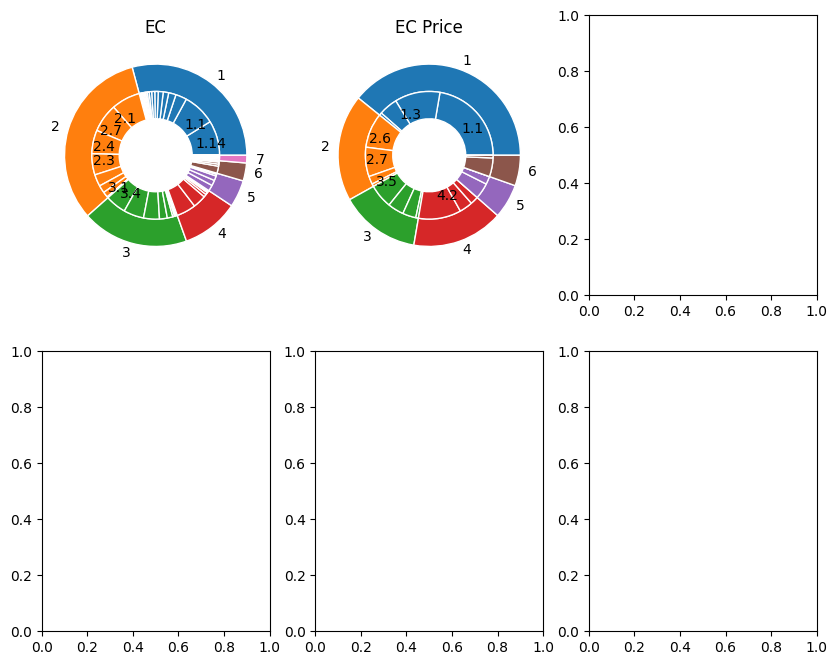

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(10, 8))

for index, title in enumerate(['EC', 'EC Price', 'EC Promiscuous', 'EC Low Identity', 'EC Easy/Med Reaction', 'EC Hard Reaction']):

    df = pd.DataFrame()
    if index == 0:
        df['EC'] = swissprot['EC number'].unique()
    if index == 1:
        df['EC'] = price['EC number']
    elif index == 2:
        df['EC'] = promiscuous.explode('EC number')['EC number']
    elif index == 3:
        df['EC'] = isolated30['EC number']
    elif index == 4:
        df['EC'] = easy_medium_test['EC number']
    elif index == 5:
        df['EC'] = hard_test['EC number']

    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 3
    j = index % 3

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(vals.shape[0]):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()

### For initial testing

In [17]:
import pandas as pd
processed = pd.read_csv('../processed_data/protein2EC.csv')
aggregated = processed.groupby('Sequence').agg({'EC number': lambda x: list(x)}).reset_index()
#map back to the Entry as well
aggregated['Entry'] = aggregated['Sequence'].map(processed.drop_duplicates('Sequence').set_index('Sequence')['Entry'])
aggregated['EC number'] = aggregated['EC number'].apply(lambda x: ';'.join(x))
aggregated = aggregated[['Entry', 'EC number', 'Sequence']]
aggregated.to_csv('../processed_data/protein2EC_train.csv', index=False, sep='\t')

In [ ]:
price = pd.read_csv('../splits/task1/price_protein_test.csv')
price.to_csv('../splits/task1/price_protein_test.csv', index=False, sep='\t')